# Prueba

### 1.Creación de una base con archivo database.sqlite

    
   1. Importación de librerías numpy, pandas, seaborn, matplot y sqllite3 para creación y lectura de archivos

In [81]:

import numpy as np
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt

  2. Crear variable de base de datos entregada y realizar lectura de la BBDD.
    

In [2]:

database="database.sqlite"
conexion = sql.connect(database) 

### 2. Las tablas de Match, League, Country y Team tiene toda la información para describir un partido detalladamente. Crea una query SQL para obtener la información detallada por partido uniendo las tablas Match, League, Country y Team.

La construcción consistió en:
    
    
1. Identificar el contenido de las tablas principales contruyendo queries y revisando su contenido:



   

• Country: Países involucrados en el torneo

In [3]:
country=('''select * from country''')
country_df=pd.read_sql_query(country, conexion)
pd.options.display.max_columns=0
country_df.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy



• League: Las ligas involucradas en el torneo

 

In [5]:
league=('''select * from league''')
league_df=pd.read_sql_query(league, conexion)
pd.options.display.max_columns=0
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


 •	Match: Los partidos entre las temporadas 2008-2016 con los resultados de los partidos mostrando el equipo local y visita

In [6]:
match=('''select * from match''')
match_df=pd.read_sql_query(match, conexion)
pd.options.display.max_columns=0
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [17]:
# exploración de las temporadas involucradas
match_df['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)


• Player: Nombre de los jugadores


In [7]:
player=('''select * from player''')
player_df=pd.read_sql_query(player, conexion)
pd.options.display.max_columns=0
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


• Player_Attributes: Atributos de los jugadores por año jugado. Ejemplo: Dominio del balón, pie dominante,etc.

    

In [15]:
player_at=('''select * from player_attributes''')
player_at_df=pd.read_sql_query(player_at, conexion)
pd.options.display.max_columns=0
player_at_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


• Team: Nombre y ranking fifa de los equipos de futbol. 

    

In [18]:
team=('''select * from team''')
team_df=pd.read_sql_query(team, conexion)
pd.options.display.max_columns=0
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


• Team_Attributes: Atributos del equipo entre el 2010 -2015. Ejemplo: Posición de balón,pases ,etc.
   


In [19]:
team_at=('''select * from team_attributes''')
team_at_df=pd.read_sql_query(team_at, conexion)
pd.options.display.max_columns=0
team_at_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [21]:
# exploración de años involucrados en la data
year_team_at=(''' select strftime('%Y',date) years from team_attributes''')
year_df=pd.read_sql_query(year_team_at, conexion)
year_df['years'].unique()

array(['2010', '2014', '2015', '2011', '2012', '2013'], dtype=object)

2. Revisión de las claves únicas de la tablas:

   • Country: Id del país (id)

   • League: Id de la liga(id), Id del país (Id_country). Se distinguio que eran los mismo id.

   • Match:id de la tabla match (id), id del match (match_api_id), id del equipo de local (home_team_api_id) y id del equipo        de visita (away_team_api_id)

   • Team: id del team(id), id del equipo (team_api_id)

3.Contrucción de queries:
    
   1.Unir Match con Team, se realizo una sobre consulta dónde primero se cruzo el equipo local, para luego realizar el cruze con el equipo de visita.
    
    Equipo local:
    
        select  t.id as id_home, t.team_api_id as team_api_id_home, t.team_fifa_api_id as team_fifa_api_id_home, 
    t.team_long_name as team_long_name_home, t.team_short_name as team_short_name_home, m.match_api_id as match_home_id   from "Match" m 
    inner join Team t on m.home_team_api_id
    = t.team_api_id  
    
    Equipo visita:
    
       select   t.id as id_away, t.team_api_id as team_api_id_away, t.team_fifa_api_id as team_fifa_api_id_away, 
    t.team_long_name as team_long_name_away, t.team_short_name as team_short_name_away, m.* from "Match" m  inner join Team t on m.away_team_api_id 
    = t.team_api_id 
                
    Unión de la consulta:
    
   
    select * from (select   t.id as id_away, t.team_api_id as team_api_id_away, t.team_fifa_api_id as team_fifa_api_id_away, 
    t.team_long_name as team_long_name_away, t.team_short_name as team_short_name_away, m.* from "Match" m  inner join Team t on m.away_team_api_id 
    = t.team_api_id  
    )a inner JOIN  (select  t.id as id_home, t.team_api_id as team_api_id_home, t.team_fifa_api_id as team_fifa_api_id_home, 
    t.team_long_name as team_long_name_home, t.team_short_name as team_short_name_home, m.match_api_id as match_home_id   from "Match" m 
    inner join Team t on m.home_team_api_id
    = t.team_api_id  )b on a.match_api_id=b.match_home_id
    
   
   2.Se unió country y liga. 
       
    select c.id as id_country, c.name as country , l.name as league from Country c inner join League l on c.id =l.country_id
    
   3.Luego se unió country y liga con team y match
    
        select * from 
    (select c.id as id_country, c.name as country , l.name as league from Country c 
    inner join League l on c.id =l.country_id) cl
    inner join (
    select * from (select   t.id as id_away, t.team_api_id as team_api_id_away, t.team_fifa_api_id as team_fifa_api_id_away, 
    t.team_long_name as team_long_name_away, t.team_short_name as team_short_name_away, m.* from "Match" m  inner join Team t on m.away_team_api_id 
    = t.team_api_id  
    )a inner JOIN  (select  t.id as id_home, t.team_api_id as team_api_id_home, t.team_fifa_api_id as team_fifa_api_id_home, 
    t.team_long_name as team_long_name_home, t.team_short_name as team_short_name_home, m.match_api_id as match_home_id   from "Match" m 
    inner join Team t on m.home_team_api_id
    = t.team_api_id  )b on a.match_api_id=b.match_home_id )m
    on cl.id_country=m.country_id
  
        

El resultado de la unión fue la siguiente:

In [8]:
# guardo en una variable query construída
query_team='''select * from 
(select c.id as id_country, c.name as country , l.name as league from Country c 
inner join League l on c.id =l.country_id) cl
inner join (
select * from (select   t.id as id_away, t.team_api_id as team_api_id_away, t.team_fifa_api_id as team_fifa_api_id_away, 
t.team_long_name as team_long_name_away, t.team_short_name as team_short_name_away, m.* from "Match" m  inner join Team t on m.away_team_api_id 
= t.team_api_id  
)a inner JOIN  (select  t.id as id_home, t.team_api_id as team_api_id_home, t.team_fifa_api_id as team_fifa_api_id_home, 
t.team_long_name as team_long_name_home, t.team_short_name as team_short_name_home, m.match_api_id as match_home_id   from "Match" m 
inner join Team t on m.home_team_api_id
= t.team_api_id  )b on a.match_api_id=b.match_home_id )m
on cl.id_country=m.country_id

'''

In [9]:
# Dataframe de la query construída  
df=pd.read_sql_query(query_team, conexion)
pd.options.display.max_columns=0
df.head()

,id_country,country,league,id_away,team_api_id_away,team_fifa_api_id_away,team_long_name_away,team_short_name_away,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,...,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id_home,team_api_id_home,team_fifa_api_id_home,team_long_name_home,team_short_name_home,match_home_id
0,1,Belgium,Belgium Jupiler League,2,9993,675.0,Beerschot AC,BAC,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1,9987,673.0,KRC Genk,GEN,492473
1,1,Belgium,Belgium Jupiler League,4,9994,2007.0,Sporting Lokeren,LOK,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,3,10000,15005.0,SV Zulte-Waregem,ZUL,492474
2,1,Belgium,Belgium Jupiler League,6,8635,229.0,RSC Anderlecht,AND,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,5,9984,1750.0,KSV Cercle Brugge,CEB,492475
3,1,Belgium,Belgium Jupiler League,8,9998,1747.0,RAEC Mons,MON,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,7,9991,674.0,KAA Gent,GEN,492476
4,1,Belgium,Belgium Jupiler League,10,9985,232.0,Standard de Liège,STL,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,

### 3. ¿Qué insights ves en la información detallada del partido?

In [13]:
# Revisión de variables categóricas
df.describe(include=['O'])

,country,league,team_long_name_away,team_short_name_away,season,date,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,team_long_name_home,team_short_name_home
count,25979,25979,25979,25979,25979,25979,14217,14217,14217,14217,14217,14217,14217,14217,25979,25979
unique,11,11,296,259,8,1694,13225,8464,8464,8466,13777,8466,8465,8420,296,259
top,England,England Premier League,Motherwell,GEN,2008/2009,2009-04-11 00:00:00,<goal />,<shoton />,<shotoff />,<foulcommit />,<card />,<cross />,<corner />,<possession />,Olympique Lyonnais,GEN
freq,3040,3040,153,366,3326,60,993,5754,5754,5752,441,5752,5753,5798,152,366


In [37]:
# Revisión de enfrentamiento más repetitivo
vs=df.groupby(by= ["team_long_name_away","team_long_name_home"])['id'].count().sort_values(ascending=False)
print(vs)

team_long_name_away      team_long_name_home    
Grasshopper Club Zürich  FC Zürich                  16
FC Zürich                FC Basel                   16
                         BSC Young Boys             16
BSC Young Boys           Grasshopper Club Zürich    16
FC Sion                  BSC Young Boys             16
                                                    ..
FC Porto                 Amadora                     1
Manchester City          Watford                     1
Sampdoria                Carpi                       1
FC Porto                 FC Penafiel                 1
FC Lorient               Angers SCO                  1
Name: id, Length: 6925, dtype: int64


In [33]:
#Mayor cantidad de goles de visita
away_goal=df.groupby(by= ["team_long_name_away"])['away_team_goal'].sum().sort_values(ascending=False)
print(away_goal)

team_long_name_away
FC Barcelona               354
Real Madrid CF             338
Celtic                     306
Ajax                       287
PSV                        282
                          ... 
Hércules Club de Fútbol      9
Uniao da Madeira             8
AC Arles-Avignon             7
Reggio Calabria              7
FC Metz                      5
Name: away_team_goal, Length: 296, dtype: int64


In [34]:
# Mayor cantidad de goles de local
home_goal=df.groupby(by= ["team_long_name_home"])['home_team_goal'].sum().sort_values(ascending=False)
print(home_goal)

team_long_name_home
Real Madrid CF          505
FC Barcelona            495
Celtic                  389
FC Bayern Munich        382
PSV                     370
                       ... 
Trofense                 14
AC Arles-Avignon         14
Feirense                 13
Córdoba CF               12
SpVgg Greuther Fürth     10
Name: home_team_goal, Length: 296, dtype: int64


Se concluye que entre el año 2008 y 2016:
    
   • El país en el que más se jugo es "Inglaterra"
    
   • La liga más jugada es la liga "England premier league"
    
   • El equipo que jugo más de visita es "Motherwell"
    
   •  El equipo que jugo más de local es "Olympigue Lyonnais"
    
   •  La campaña del "2008/2009" es dónde se jugaron más partidos
    
   •  El encuentro que más se repite es el de "Grasshopper Club Zürich -  FC Zürich"  
    
   •  El equipo con más goles de local es "Real Madrid FC"
    
   •  El equipo con más goles de visita es "Barcelona FC"

### 4. Dado que queremos armar un equipo maravilloso nos interesa tener un perfil por cada jugador. Ocupa SQL y/o Python para crear un Dataframe que tenga un jugador por fila con toda la información que creas relevante

Supuestos:
    
  •  Se asume que estamos en estamos en el año 2016 y hoy es '2016-12-29 00:00:00'
    
  •  Se asume que todos los jugadores no tienen equipo actual para la compra de estos
  
  •  Se asume que la última medición del jugador es la de su rendimiento
    
Posterior ha estás suposiciones, se dejo su última medición de rendimiento.

    select   * , max (date) last_measurement   from Player_Attributes pa 
       group by  player_api_id

Luego se obtuvo la edad de los jugadores 

    select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p

Para construir la información final ordenado por overall_rating:

In [44]:
query_players='''select p.*, pa.* from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id order by overall_rating desc '''

In [45]:
df_players=pd.read_sql_query(query_players, conexion)
df_players.head(40)




,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,ages,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,last_measurement
0,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,29,102483,158023,30981,2015-12-17 00:00:00,94,94,left,medium,low,80,93,71,88,85.0,96,89.0,90,79,96,95,90,92.0,92,95.0,80,68.0,75,59,88,48,22,90,90.0,74,13,23,21.0,6,11,15,14,8,2015-12-17 00:00:00
1,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,31,33331,20801,30893,2015-10-16 00:00:00,93,93,right,high,low,82,95,86,81,87.0,93,88.0,77,72,91,91,93,90.0,92,62.0,94,94.0,90,79,93,62,29,93,81.0,85,22,31,23.0,7,11,15,14,11,2015-10-16 00:00:00
2,7867,19533,Neymar,190871,1992-02-05 00:00:00,175.26,150,24,131465,190871,19533,2016-02-04 00:00:00,90,94,right,high,medium,72,88,62,78,83.0,94,78.0,79,74,93,91,90,92.0,86,84.0,78,61.0,79,45,73,56,36,89,79.0,81,21,24,33.0,9,9,15,15,11,2016-02-04 00:00:00
3,6556,27299,Manuel Neuer,167495,1986-03-27 00:00:00,193.04,203,30,109034,167495,27299,2016-04-21 00:00:00,90,90,right,medium,medium,15,13,25,48,11.0,16,14.0,11,47,31,58,61,43.0,87,35.0,25,78.0,44,83,16,29,30,12,70.0,37,10,10,11.0,85,87,91,90,87,2016-04-21 00:00:00
4,6377,40636,Luis Suarez,176580,1987-01-24 00:00:00,182.88,187,29,105984,176580,40636,2015-10-16 00:00:00,90,90,right,high,medium,77,90,77,82,87.0,88,86.0,84,64,91,88,78,86.0,91,60.0,88,69.0,88,76,85,78,41,91,84.0,85,30,45,38.0,27,25,31,33,37,2015-10-16 00:00:00
5,951,30834,Arjen Robben,9014,1984-01-23 00:00:00,180.34,176,32,16461,9014,30834,2016-01-28 00:00:00,89,89,left,high,low,80,85,51,85,86.0,93,86.0,83,73,90,90,90,91.0,91,91.0,86,61.0,73,65,90,47,39,88,84.0,80,29,26,26.0,10,8,11,5,15,2016-01-28 00:00:00
6,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209,35,183673,41236,35724,2015-09-21 00:00:00,89,89,right,medium,low,76,90,76,84,92.0,87,80.0,80,76,90,72,74,86.0,85,41.0,93,72.0,75,93,88,84,20,86,83.0,91,15,41,27.0,13,15,10,9,12,2015-09-21 00:00:00
7,742,30955,Andres Iniesta,41,1984-05-11 00:00:00,170.18,150,32,12774,41,30955,2015-10-16 00:00:00,88,88,right,high,medium,79,73,54,92,74.0,90,80.0,70,86,92,76,75,83.0,88,87.0,65,54.0,64,59,74,58,68,85,92.0,71,57,57,56.0,6,13,6,13,7,2015-10-16 00:00:00
8,7327,36378,Mesut Oezil,176635,1988-10-15 00:00:00,182.88,168,28,122442,176635,36378,2016-02-18 00:00:00,88,89,left,medium,low,80,75,54,89,77.0,86,84.0,79,84,90,77,68,84.0,87,70.0,70,52.0,64,56,76,54,24,84,93.0,76,22,16,19.0,6,14,10,6,14,2016-02-18 00:00:00
9,9674,37412,Sergio Aguero,153079,1988-06-02 00:00:00,172.72,163,28,160836,153079,37412,2016-03-10 00:00:00,88,88,right,high,medium,70,90,68,79,85.0,89,82.0,72,63,89,92,86,86.0,88,90.0,87,80.0,74,73,84,57,24,91,83.0,83,13,20,12.0,13,15,6,11,14,2016-03-10 00:00:00


En el perfil del jugador se encontró:

Información sucia en attacking_work_rate y defensive_work_rate, ya que se asume que medium, high y low son los parámetros, por lo tanto, se asumio que los que no pertenecian a está clasificación se eliminaron las filas

In [48]:

df_players["attacking_work_rate"].unique()

array(['medium', 'high', 'low', None, 'y', 'None', 'le', 'norm', 'stoc'],
      dtype=object)

In [50]:
df_players["defensive_work_rate"].unique()

array(['low', 'medium', 'high', '_0', 'es', '2', 'ean', 'o', '3', 'ormal',
       '6', '7', '1', '8', 'tocky', '4', '5', '0', '9'], dtype=object)

In [70]:
df_players2["preferred_foot"].unique()

array(['left', 'right'], dtype=object)

In [64]:
df_players2=df_players[(df_players["defensive_work_rate"] == "low") | (df_players["defensive_work_rate"] == "high") | (df_players["defensive_work_rate"] == "medium") ]

In [65]:
df_players2=df_players[(df_players["attacking_work_rate"] == "low") | (df_players["attacking_work_rate"] == "high") | (df_players["attacking_work_rate"] == "medium") ]

In [69]:
df_players2.head(40)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,ages,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,last_measurement
0,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,29,102483,158023,30981,2015-12-17 00:00:00,94,94,left,medium,low,80,93,71,88,85.0,96,89.0,90,79,96,95,90,92.0,92,95.0,80,68.0,75,59,88,48,22,90,90.0,74,13,23,21.0,6,11,15,14,8,2015-12-17 00:00:00
1,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,31,33331,20801,30893,2015-10-16 00:00:00,93,93,right,high,low,82,95,86,81,87.0,93,88.0,77,72,91,91,93,90.0,92,62.0,94,94.0,90,79,93,62,29,93,81.0,85,22,31,23.0,7,11,15,14,11,2015-10-16 00:00:00
2,7867,19533,Neymar,190871,1992-02-05 00:00:00,175.26,150,24,131465,190871,19533,2016-02-04 00:00:00,90,94,right,high,medium,72,88,62,78,83.0,94,78.0,79,74,93,91,90,92.0,86,84.0,78,61.0,79,45,73,56,36,89,79.0,81,21,24,33.0,9,9,15,15,11,2016-02-04 00:00:00
3,6556,27299,Manuel Neuer,167495,1986-03-27 00:00:00,193.04,203,30,109034,167495,27299,2016-04-21 00:00:00,90,90,right,medium,medium,15,13,25,48,11.0,16,14.0,11,47,31,58,61,43.0,87,35.0,25,78.0,44,83,16,29,30,12,70.0,37,10,10,11.0,85,87,91,90,87,2016-04-21 00:00:00
4,6377,40636,Luis Suarez,176580,1987-01-24 00:00:00,182.88,187,29,105984,176580,40636,2015-10-16 00:00:00,90,90,right,high,medium,77,90,77,82,87.0,88,86.0,84,64,91,88,78,86.0,91,60.0,88,69.0,88,76,85,78,41,91,84.0,85,30,45,38.0,27,25,31,33,37,2015-10-16 00:00:00
5,951,30834,Arjen Robben,9014,1984-01-23 00:00:00,180.34,176,32,16461,9014,30834,2016-01-28 00:00:00,89,89,left,high,low,80,85,51,85,86.0,93,86.0,83,73,90,90,90,91.0,91,91.0,86,61.0,73,65,90,47,39,88,84.0,80,29,26,26.0,10,8,11,5,15,2016-01-28 00:00:00
6,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209,35,183673,41236,35724,2015-09-21 00:00:00,89,89,right,medium,low,76,90,76,84,92.0,87,80.0,80,76,90,72,74,86.0,85,41.0,93,72.0,75,93,88,84,20,86,83.0,91,15,41,27.0,13,15,10,9,12,2015-09-21 00:00:00
7,742,30955,Andres Iniesta,41,1984-05-11 00:00:00,170.18,150,32,12774,41,30955,2015-10-16 00:00:00,88,88,right,high,medium,79,73,54,92,74.0,90,80.0,70,86,92,76,75,83.0,88,87.0,65,54.0,64,59,74,58,68,85,92.0,71,57,57,56.0,6,13,6,13,7,2015-10-16 00:00:00
8,7327,36378,Mesut Oezil,176635,1988-10-15 00:00:00,182.88,168,28,122442,176635,36378,2016-02-18 00:00:00,88,89,left,medium,low,80,75,54,89,77.0,86,84.0,79,84,90,77,68,84.0,87,70.0,70,52.0,64,56,76,54,24,84,93.0,76,22,16,19.0,6,14,10,6,14,2016-02-18 00:00:00
9,9674,37412,Sergio Aguero,153079,1988-06-02 00:00:00,172.72,163,28,160836,153079,37412,2016-03-10 00:00:00,88,88,right,high,medium,70,90,68,79,85.0,89,82.0,72,63,89,92,86,86.0,88,90.0,87,80.0,74,73,84,57,24,91,83.0,83,13,20,12.0,13,15,6,11,14,2016-03-10 00:00:00



### 5. ¿Qué insights ves en el perfil por jugador? ¿Qué data crees que es relevante para elegir a los mejores jugadores?



In [175]:
corr_players=df_players2.corr()

<AxesSubplot:>

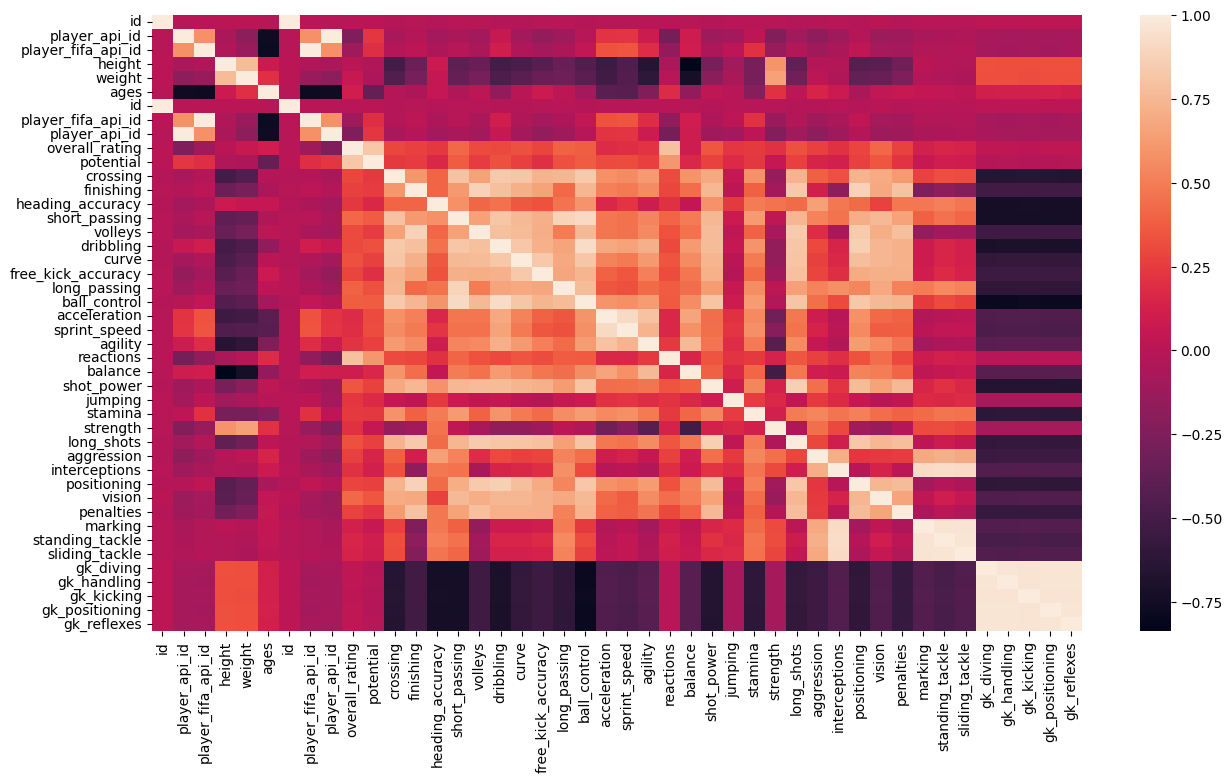

In [177]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_players, xticklabels=corr_players.columns,yticklabels=corr_players.columns)

In [96]:
df_players2.groupby(by= ["preferred_foot"]).count()["id"]

,id,id
preferred_foot,,
left,2426,2426
right,7481,7481


In [99]:
df_players2.groupby(by= ["attacking_work_rate"]).count()["id"]

,id,id
attacking_work_rate,,
high,2375,2375
low,565,565
medium,6967,6967


In [98]:
df_players2.groupby(by= ["defensive_work_rate"]).count()["id"]

,id,id
defensive_work_rate,,
high,1555,1555
low,1041,1041
medium,7311,7311


Los insights que veo es que :
   
   Existe una correlación clara entre overall_ratings  vs vision, potencial y reactions.
    
   Podemos observar que las variables relacionada con arqueros "GK", están fuertemente relacionada entre ellas y con las variables; potencial, reactions, jumping, stregth y height comparada con las demás.
    
   Existen más jugadores diestros
   
   Existen más jugadores que atacan y defienden a nivel medio.
    
La data que veo relevante para elegir a los mejores jugadores es el overall_rating, preferred_foot, defensive_work_rate, attacking_work_rate, GKs en caso de ser arquero y los demás atributos de jugador dependerá de la posición en la cual se ponga el jugador.   


### BONUS: ¿Cuál es tu sugerencia de jugadores para armar el mejor equipo de la historia? Argumenta tu respuesta.


##### Se asumirá que la posición será: 1- 4 -4-2 


    

Arquero: Debemos escoger por el gk promedio más alto y en caso de ocurrir un empate se utilizará la variable altura

In [130]:

query_arquero='''select p.player_name , pa.overall_rating,p.height, (pa.gk_diving+pa.gk_handling+pa.gk_kicking+pa.gk_positioning+pa.gk_reflexes/5) gk_avg from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id order by  gk_avg  desc '''




In [131]:
df_arquero=pd.read_sql_query(query_arquero, conexion)

df_arquero.head(2)

,player_name,overall_rating,height,gk_avg
0,Manuel Neuer,90,193.04,370
1,Edwin van der Sar,83,198.12,362


##### El arquero escogido es Manuel Neuer

Delanteros: Los delanteros serán los dos primeros de la lista con el overall_rating más alto que no contengan un Gk mayor a 50. Además deberá ser un delantero diestro y zurdo.

In [137]:

query_delantero='''select p.player_name ,pa.preferred_foot, pa.overall_rating,p.height, (pa.gk_diving+pa.gk_handling+pa.gk_kicking+pa.gk_positioning+pa.gk_reflexes/5) gk_avg from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id
where gk_avg<50
order by  overall_rating  desc '''


In [139]:
df_delantero=pd.read_sql_query(query_delantero, conexion)

df_delantero.head(4)

,player_name,preferred_foot,overall_rating,height,gk_avg
0,Lionel Messi,left,94,170.18,47
1,Cristiano Ronaldo,right,93,185.42,49
2,Arjen Robben,left,89,180.34,37
3,Zlatan Ibrahimovic,right,89,195.58,49


##### Los delanteros escogidos son Lionel Messi y Cristiano Ronaldo

Defensas: Las defensas serán los dos primeros de la lista con el overall_rating más alto que contengan un defensive_work_rate "high". Además deberá ser 2 defensas diestros y 2 zurdos.

In [150]:


query_defensa_l='''select p.player_name ,pa.preferred_foot, pa.overall_rating,p.height, (pa.gk_diving+pa.gk_handling+pa.gk_kicking+pa.gk_positioning+pa.gk_reflexes/5) gk_avg from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id
where defensive_work_rate="high" and preferred_foot="left"
order by  overall_rating  desc '''



In [151]:
df_defensa_l=pd.read_sql_query(query_defensa_l, conexion)

df_defensa_l.head(2)

,player_name,preferred_foot,overall_rating,height,gk_avg
0,Giorgio Chiellini,left,86,187.96,12
1,Blaise Matuidi,left,84,175.26,36


In [153]:

query_defensa_r='''select p.player_name ,pa.preferred_foot, pa.overall_rating,p.height, (pa.gk_diving+pa.gk_handling+pa.gk_kicking+pa.gk_positioning+pa.gk_reflexes/5) gk_avg from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id
where defensive_work_rate="high" and preferred_foot="right"
order by  overall_rating  desc '''

In [154]:
df_defensa_r=pd.read_sql_query(query_defensa_r, conexion)

df_defensa_r.head(2)

,player_name,preferred_foot,overall_rating,height,gk_avg
0,Thiago Silva,right,88,182.88,37
1,Philipp Lahm,right,87,170.18,43


##### Los defensas escogidos son Giorgio Chiellini, Blaise Matuidi , Thiago Silva, Phillipp Lahm

Medio Campo : Para medio campo se promedió una serie de características para obtenerlo como:
     
•	marking

•	standing_tackle

•	sliding_tackle

•	interceptions

•	aggression

•	strength

•	balance

•	reactions 

•	positioning 

•	sprint_speed 

•	acceleration 

•	jumping 

•	heading_accuracy 

•	short_passing
        
 Además deberá ser 2 delanteros diestros y 2 zurdos.

In [169]:
query_central_r='''select p.player_name ,pa.preferred_foot, pa.overall_rating,p.height, (marking + standing_tackle + sliding_tackle + interceptions + aggression + strength + balance + reactions + positioning + sprint_speed + acceleration 
+jumping +heading_accuracy +short_passing )/14 central  from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id
where defensive_work_rate="high" and preferred_foot="right"
order by  central desc '''




In [170]:
df_central_r=pd.read_sql_query(query_central_r, conexion)

df_central_r.head(5)

,player_name,preferred_foot,overall_rating,height,central
0,Arturo Vidal,right,85,180.34,81
1,Gary Medel,right,81,170.18,80
2,Thiago Silva,right,88,182.88,80
3,Serge Aurier,right,81,175.26,80
4,Pablo Zabaleta,right,82,177.80,79


In [171]:
query_central_l='''select p.player_name ,pa.preferred_foot, pa.overall_rating,p.height, (marking + standing_tackle + sliding_tackle + interceptions + aggression + strength + balance + reactions + positioning + sprint_speed + acceleration 
+jumping +heading_accuracy +short_passing )/14 central  from 
(select   * , max (date) last_measurement   from Player_Attributes pa 
group by  player_api_id ) pa
inner join  (select  * , ('2016-12-29 00:00:00' - birthday) ages  from Player p )
p on pa.player_api_id =p.player_api_id
where defensive_work_rate="high" and preferred_foot="left"
order by  central desc '''


In [172]:
df_central_l=pd.read_sql_query(query_central_l, conexion)

df_central_l.head(5)

,player_name,preferred_foot,overall_rating,height,central
0,Blaise Matuidi,left,84,175.26,79
1,Patrice Evra,left,81,175.26,78
2,Giorgio Chiellini,left,86,187.96,77
3,Samuel Umtiti,left,80,180.34,77
4,Nemanja Matic,left,83,193.04,76


##### Los medio campistas escogidos son Arturo Vidal, Gary Medel, Samuel Umtitii y Patrice Evra

El equipo estaría compuesto por:
    
   Arquero:  Manuel Neuer
   
   Defensas: Giorgio Chiellini, Blaise Matuidi , Thiago Silva y Phillipp Lahm
   
   Medio Campistas: Arturo Vidal, Gary Medel, Samuel Umtiti y Patrice Evra
   
   Delanteros: Lionel Messi y Cristiano Ronaldo

Con este equipo te aseguro que ganas todas las copas de las ligas.